<a href="https://colab.research.google.com/github/duartejr/challenge_data_science_alura_voz/blob/main/semana_2_analise_variavel_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semana 2 do Challenge

# Objetivo: Analisar a variável target: Churn

## Bibliotecas necessárias

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carregando dados

In [17]:
dados = pd.read_csv('../dados/dados_clientes_alura_voz.csv')

### Visualizar a distribuição da variável target: **Churn**

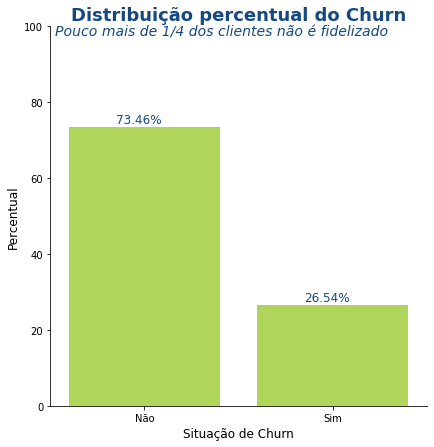

In [18]:
churn_rate = dados.churn.value_counts(normalize=True)*100
churn_rate = churn_rate.to_frame().reset_index()
churn_rate.columns = ['Situação de Churn', 'Percentual']

fig = sns.catplot(data=churn_rate, x='Situação de Churn', y='Percentual', kind='bar', color='#b7ea45', height=6)
fig.ax.set_ylim(0, 100)
fig.set_xlabels(fontsize=12)
fig.set_ylabels(fontsize=12)

for p in fig.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + .25
    txt_y = p.get_height() + 1
    fig.ax.text(txt_x, txt_y, txt, color='#164980', fontsize=12)

plt.title('Distribuição percentual do Churn', fontsize=18, color='#164980', weight='bold')
plt.suptitle('Pouco mais de 1/4 dos clientes não é fidelizado', fontsize=14, color='#164980', style='italic')
fig.set(xticklabels=['Não', 'Sim']);

## Histograma dos gastos totais dos Clientes

O dados foram divididos entre os casos de cliente fidelizados (sem churn) e não fidelizados (com churn)

In [51]:
def plot_histogramas(dados_clientes, x_col, xlabel, ylim=(0, 1400), xlim=(0, 9000)):
    fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))

    sns.histplot(data=dados_clientes.query('churn == 0'), x=x_col, ax=axes[0], color='#81d712')
    axes[0].set_title('Distribuição dos clientes sem Churn', fontsize=14, color='#164980', style='italic')
    axes[0].set_xlabel(xlabel, fontsize=12)
    axes[0].set_xlim(xlim)
    axes[0].set_ylabel('Nº de clientes', fontsize=12)
    axes[0].set_ylim(ylim)
    axes[0].spines[['top', 'right']].set_visible(False)

    sns.histplot(data=dados_clientes.query('churn == 1'), x=x_col, ax=axes[1], color='#164980')
    axes[1].set_title('Distribuição dos clientes com Churn', fontsize=14, color='#164980', style='italic')
    axes[1].set_xlabel(xlabel, fontsize=12)
    axes[1].set_xlim(xlim)
    axes[1].spines[['top', 'right']].set_visible(False)

    xlabel = xlabel.lower()

    fig.suptitle(f'Distribuição dos {xlabel} dos clientes', fontsize=18, color='#164980', weight='bold')
    plt.show()


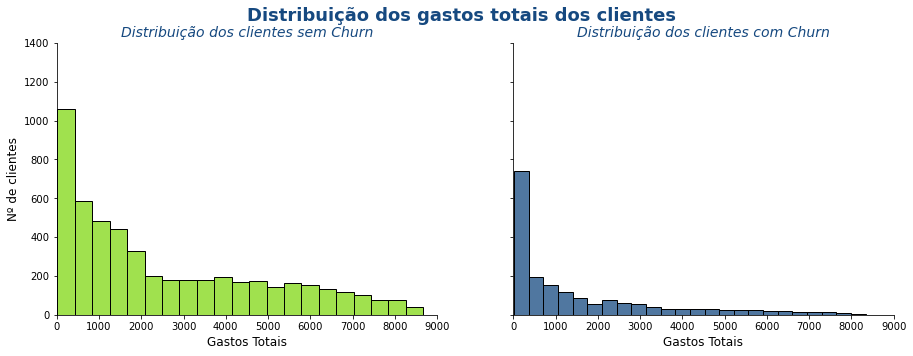

In [52]:
plot_histogramas(dados, x_col='gastos_totais', xlabel='Gastos Totais')

## Histograma dos gastos mensais dos clientes

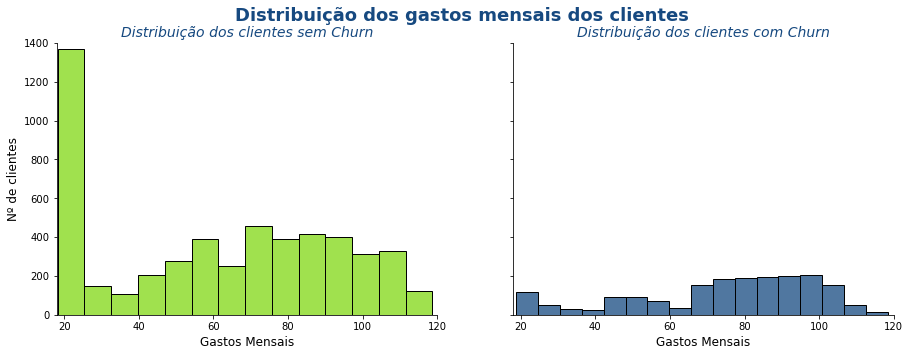

In [21]:
plot_histogramas(dados, x_col='gastos_mensais', xlabel='Gastos Mensais', xlim=(18, 120))

## Histograma do tempo de permanência dos clientes

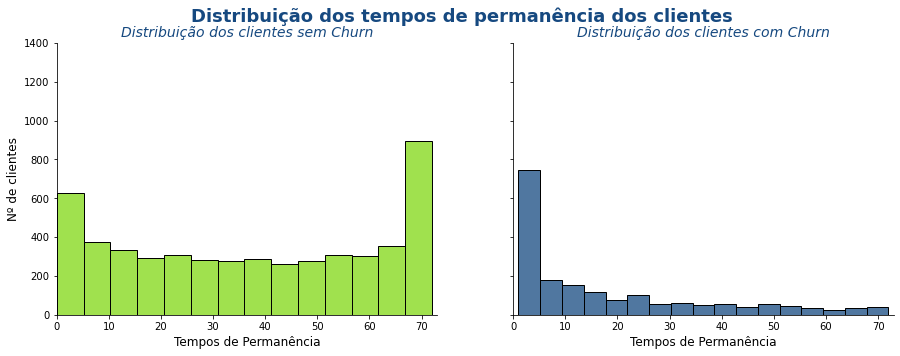

In [22]:
plot_histogramas(dados, x_col='tempo_permanencia', xlabel='Tempos de Permanência', xlim=(0, 73))

## Corelação entre as variáveis

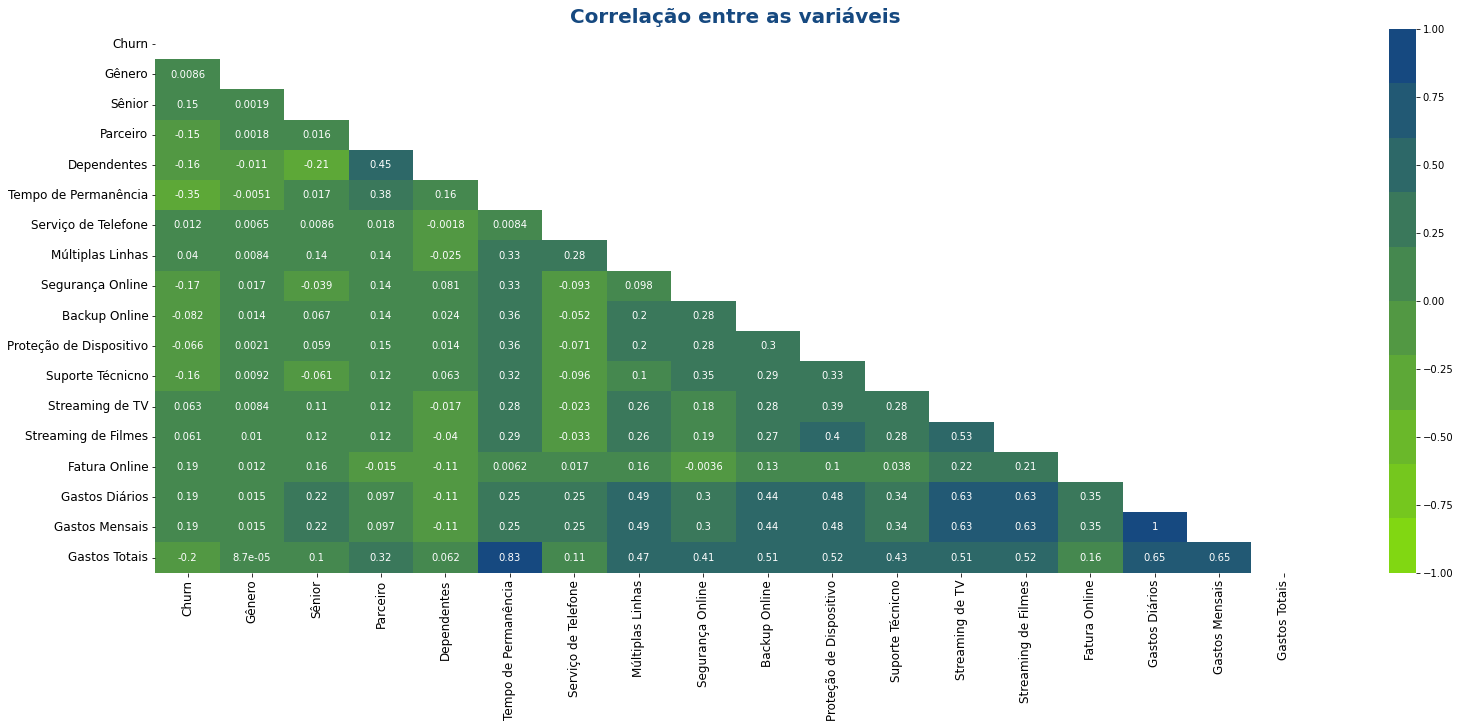

In [23]:
variaveis_correlacao = ['churn', 'genero', 'senior', 'parceiro', 'dependentes',
       'tempo_permanencia', 'servico_telefone', 'multiplas_linhas', 'seguranca_online',
       'backup_online', 'protecao_dispositivo', 'suporte_tecnico', 'streaming_TV',
       'streaming_filmes', 'fatura_online', 'gastos_diarios', 'gastos_mensais',
       'gastos_totais']
labels = ['Churn', 'Gênero', 'Sênior', 'Parceiro', 'Dependentes', 'Tempo de Permanência',
       'Serviço de Telefone', 'Múltiplas Linhas', 'Segurança Online', 'Backup Online',
       'Proteção de Dispositivo', 'Suporte Técnicno', 'Streaming de TV', 'Streaming de Filmes',
       'Fatura Online', 'Gastos Diários', 'Gastos Mensais', 'Gastos Totais']

plt.figure(figsize=(26, 10))
cmap = sns.color_palette('blend:#81d712,#164980', 10)
mask = np.triu(np.ones_like(dados[variaveis_correlacao].corr(), dtype=bool))
ax = sns.heatmap(dados[variaveis_correlacao].corr(), vmin=-1, vmax=1, annot=True, cmap=cmap, mask = mask)
ax.set_title('Correlação entre as variáveis', fontsize=20, color='#164980', weight='bold')
ax.set_yticklabels(labels, fontsize=12)
ax.set_xticklabels(labels, fontsize=12)
plt.show()

## Perfil dos clientes

## Criando variável `com_internet`

In [24]:
# Criando variável que representa se o cliente têm algum serviço de internet ou não
f = lambda x: 0 if x == 'Não' else 1
dados['com_internet'] = dados.servico_internet.apply(f)

### Colunas das características dos clientes

In [25]:
colunas_caracteristicas = ['genero', 'senior', 'parceiro', 'dependentes', 'servico_telefone', 'multiplas_linhas',
                            'com_internet', 'seguranca_online', 'backup_online', 'protecao_dispositivo',
                            'suporte_tecnico', 'streaming_TV', 'streaming_filmes', 'fatura_online']
labels_caracteristicas = ['Gênero', 'Sênior', 'Parceiro', 'Dependentes', 'Serviço de Telefone', 
                        'Múltiplas Linhas', 'Serviço de Internet', 'Segurança Online', 'Backup Online',
                        'Proteção de Dispositivo', 'Suporte Técnicno', 'Streaming de TV', 'Streaming de Filmes',
                        'Fatura Online']

### Função para contar clientes

In [26]:
# contabilizando números de clientes por categorias
def count_categorias(dados_clientes):
    counts = dados_clientes[colunas_caracteristicas].apply(pd.Series.value_counts)
    counts_T = counts.T
    counts_T['total'] = counts_T[0] + counts_T[1]
    counts_T = counts_T.reset_index(level=0)
    counts_T[[0, 1]] /= counts_T['total'] 
    counts_T['total'] = 1
    counts_T[[0, 1, 'total']] *= 100
    return counts_T

### Função para gerar gráfico do perfil dos clientes

In [45]:
def plot_caracteristicas(dados_clientes, titulo):
    map_genero = {0:'MASCULINO', 1:'FEMININO'}
    map_classes = {0:'NÃO', 1:'SIM'}

    plt.figure(figsize=(10, 10))

    fig = sns.barplot(x="total", y="index", data=dados_clientes, label=False, color="#164980")

    for i in range(len(dados_clientes)):
        if i == 0:
            text = f'{dados_clientes[1][i]:.2f}% {map_genero[1]}'
        else:
            text = f'{dados_clientes[1][i]:.2f}% {map_classes[1]}'

        pos_x = 84

        if i == 0:
            pos_x = 76
        
        plt.text(pos_x, i, text, color='w', weight='bold', fontsize=12)

    fig2 = sns.barplot(x=0, y="index", data=dados_clientes, label=False, color="#81d712");

    for i in range(len(dados_clientes)):
        if i == 0:
            text = f'{dados_clientes[0][i]:.2f}% {map_genero[0]}'
        else:
            text = f'{dados_clientes[0][i]:.2f}% {map_classes[0]}'

        pos_x = 1
        
        plt.text(pos_x, i, text, color='w', weight='bold', fontsize=12)
    
    fig2.set_xlabel('')
    fig2.set_ylabel('')
    fig2.set_yticklabels(labels_caracteristicas, fontsize=12)
    fig2.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
    

    plt.title(titulo, fontsize=18)

### Perfil dos clientes sem churn

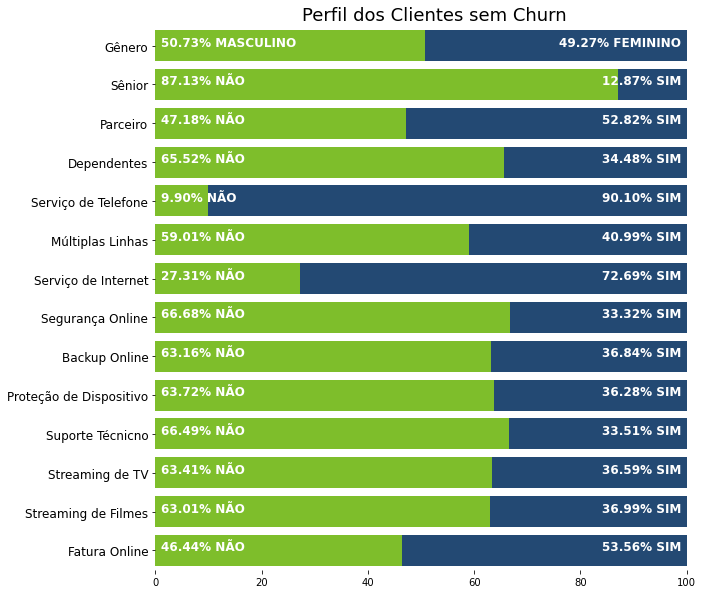

In [46]:
cliente_sem_churn = dados.query('churn == 0')
counts_T = count_categorias(cliente_sem_churn)
plot_caracteristicas(counts_T, 'Perfil dos Clientes sem Churn')

### Perfil dos Clientes com Churn

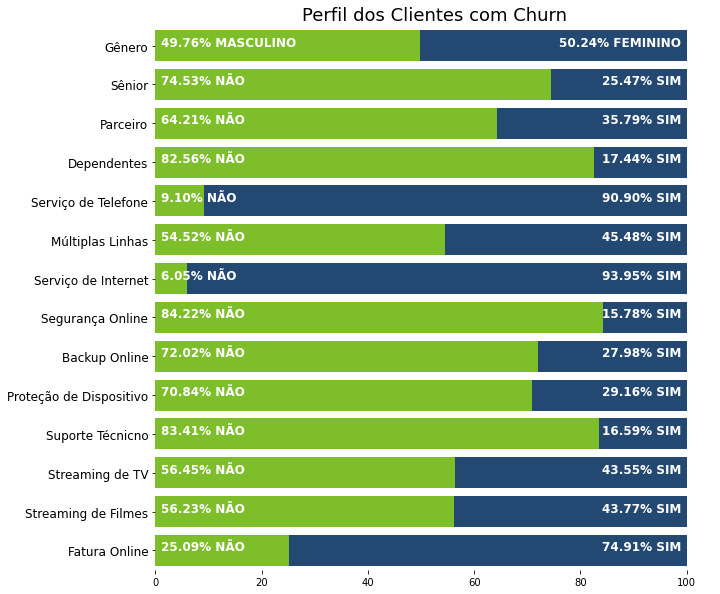

In [47]:
clientes_churn = dados.query('churn == 1')
counts_churn = count_categorias(clientes_churn)
plot_caracteristicas(counts_churn, 'Perfil dos Clientes com Churn')

## Serviço de internet

In [48]:
def plot_servicos_internet(dados_clientes, titulo):
    plt.figure(figsize=(10,5))
    ax = sns.countplot(y='servico_internet', data=dados_clientes, orient='horizontal', color='#164980',
                    order=['Fibra Óptica', 'DSL', 'Não'])
    ax.spines[['top', 'right']].set_visible(False)
    plt.title(titulo, fontsize=20, color='#164980')
    plt.xlabel('Nª de clientes', fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylabel('')

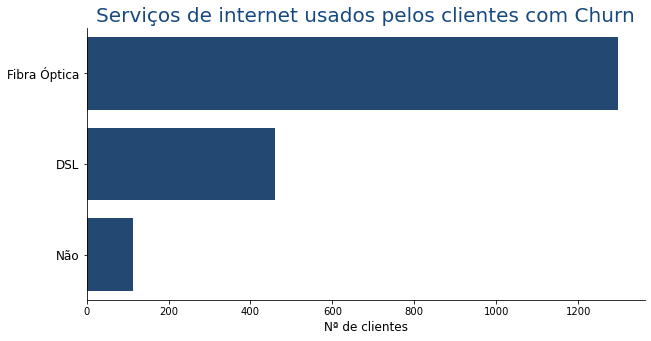

In [49]:
titulo = 'Serviços de internet usados pelos clientes com Churn'
plot_servicos_internet(clientes_churn, titulo)


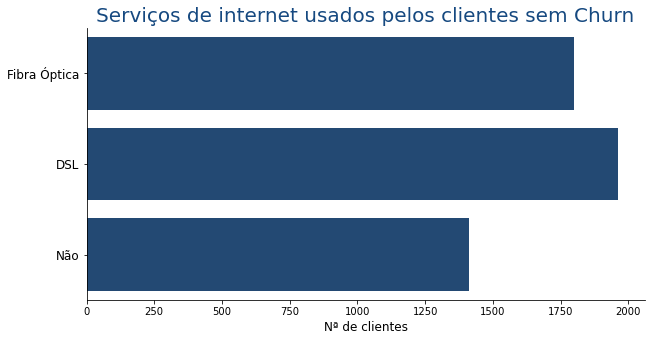

In [50]:
titulo = 'Serviços de internet usados pelos clientes sem Churn'
plot_servicos_internet(cliente_sem_churn, titulo)